In [1]:
#Core libraries
import pandas as pd
import numpy as np


#Preprocessing & essentials
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#Neural Network Algorithms
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense

#Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#performance Metrics
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#importing and reading dataset
data = pd.read_csv('birth_type.csv')
data.head()

,age,nod,dtm,bop,htp,dtp
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [3]:
#--------Data Description-----------
#age = Mother's Age
#nod = Number of Previous Delivery (1 - 4) Delivery Times
#dtm = Delivery Time (0 = Timely, 1 = Premature, 2 = Latecomer)
#bop = Blood of Pressure (0 = Low, 1 = Normal, 2 = High)
#htp = Heart Proble (0 = Apt, 1=Inept)
#dtp = Delivery Type (0 = Spontaneous Vaginal Delivery, 1 = Cesarean Section)

data.describe()

,age,nod,dtm,bop,htp,dtp
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


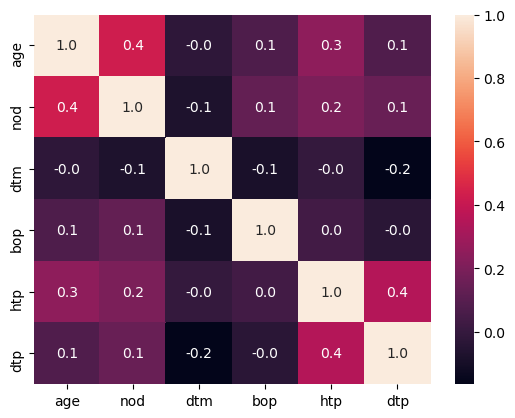

In [4]:
#Data Correlation

sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

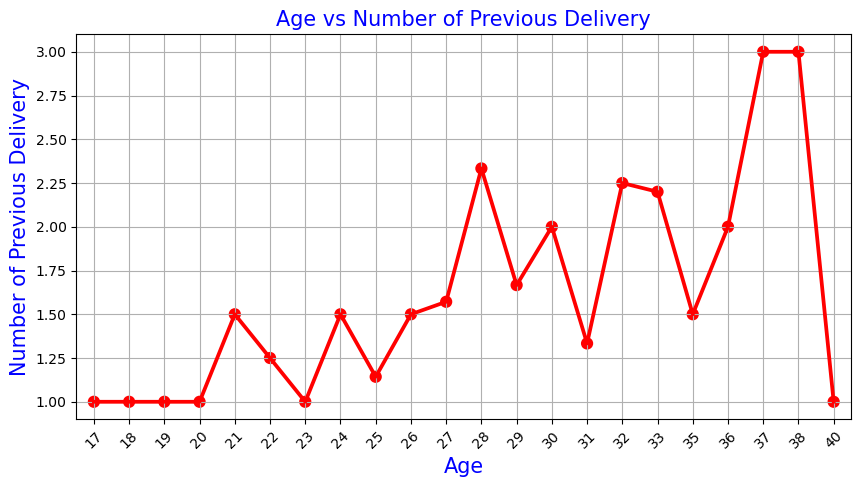

In [5]:
#ploting Age vs Number of Previous Delivery

age_unique=sorted(data.age.unique())
age_nod_values=data.groupby('age')['nod'].count().values
mean_nod=[]
for i,age in enumerate(age_unique):
    mean_nod.append(sum(data[data['age']==age].nod)/age_nod_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_nod,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Number of Previous Delivery',fontsize = 15,color='blue')
plt.title('Age vs Number of Previous Delivery',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [6]:
#Dividing Dependent & Independent Variables

X = data[['age', 'nod', 'dtm', 'htp']]
y = data['dtp']

In [7]:
#Dividing Dataset into testing and training dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [8]:
#Neural Network 

model = Sequential([
    Dense(16, input_shape=(4,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid'),
])

In [9]:
#Supervised Learning Condition

adam = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Model Training

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
                    batch_size=5, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
13/13 - 21s - loss: 0.9982 - accuracy: 0.4062 - val_loss: 0.7094 - val_accuracy: 0.3125
Epoch 2/50
13/13 - 0s - loss: 0.7165 - accuracy: 0.4844 - val_loss: 0.7085 - val_accuracy: 0.3125
Epoch 3/50
13/13 - 0s - loss: 0.7201 - accuracy: 0.4375 - val_loss: 0.6923 - val_accuracy: 0.6250
Epoch 4/50
13/13 - 0s - loss: 0.7188 - accuracy: 0.4844 - val_loss: 0.7294 - val_accuracy: 0.3750
Epoch 5/50
13/13 - 0s - loss: 0.7162 - accuracy: 0.5312 - val_loss: 0.7122 - val_accuracy: 0.2500
Epoch 6/50
13/13 - 0s - loss: 0.7103 - accuracy: 0.5000 - val_loss: 0.7578 - val_accuracy: 0.3750
Epoch 7/50
13/13 - 0s - loss: 0.7106 - accuracy: 0.5156 - val_loss: 0.7003 - val_accuracy: 0.2500
Epoch 8/50
13/13 - 0s - loss: 0.7162 - accuracy: 0.5781 - val_loss: 0.6610 - val_accuracy: 0.6250
Epoch 9/50
13/13 - 0s - loss: 0.7136 - accuracy: 0.5625 - val_loss: 0.6781 - val_accuracy: 0.6250
Epoch 10/50
13/13 - 0s - loss: 0.7047 - accuracy: 0.5000 - val_loss: 0.6636 - val_accuracy: 0.6250
Epoch 11/50
13/13 

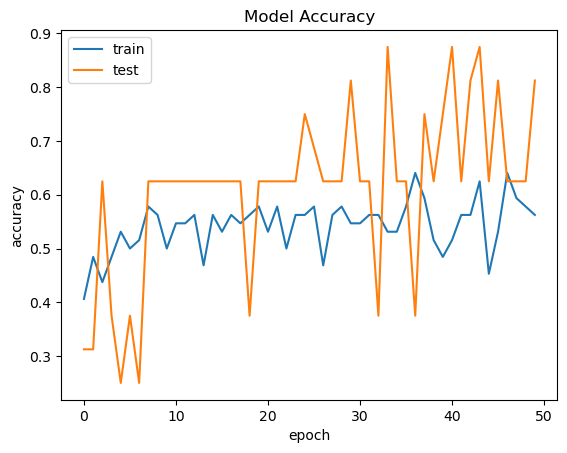

In [11]:
#Training Model Accuracy 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

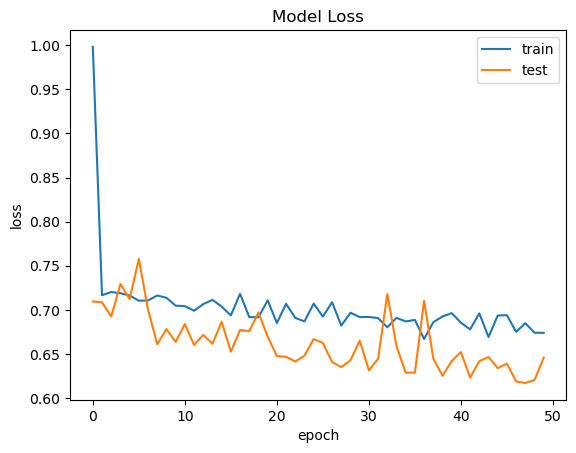

In [12]:
#Model Value Loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [13]:
#Machine Learning with Random Forest & Naive Bayes
rfg = RandomForestClassifier(max_depth=2, random_state=42)
nby = GaussianNB()

#Training Process
rfg.fit(X_train, y_train)
nby.fit(X_train, y_train)

GaussianNB()

In [14]:
#Performance Evaluation with Prediction Score & Classification Report
y_snn = np.argmax(model.predict(X_test), axis=1)
y_rfg = rfg.predict(X_test)
y_nby = nby.predict(X_test)

nn_scr = accuracy_score(y_test, y_snn)
rfg_scr = rfg.score(X_test, y_test)
nby_scr = nby.score(X_test, y_test)

In [15]:
#Accuracy Score Output
print('Prediction Accuracy Score for Neural Network = ', nn_scr*100,'%')
print('Prediction Accuracy Score for Random Forest = ', rfg_scr*100,'%')
print('Prediction Accuracy Score for Naive Bayes = ', nby_scr*100,'%')

Prediction Accuracy Score for Neural Network =  81.25 %
Prediction Accuracy Score for Random Forest =  68.75 %
Prediction Accuracy Score for Naive Bayes =  75.0 %


In [16]:
#Classification Report Output
print("Report for Neural Network")
print(classification_report(y_test, y_snn))
print("")
print("Report for Random Forest") 
print(classification_report(y_test, y_rfg))
print("")
print("Report for Naive Bayes")
print(classification_report(y_test, y_nby))

Report for Neural Network
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.89      0.80      0.84        10

    accuracy                           0.81        16
   macro avg       0.80      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16


Report for Random Forest
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.73      0.80      0.76        10

    accuracy                           0.69        16
   macro avg       0.66      0.65      0.65        16
weighted avg       0.68      0.69      0.68        16


Report for Naive Bayes
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.80      0.80      0.80        10

    accuracy                           0.75        16
   macro avg       0.73      0.73      0.73        1